# Personal ADS Challenge of Filip Georgiev

### The dataset used is "UFC-Fight historical data from 1993 to 2019" with the intention of trying to predict possible outcomes of fights.

In [1]:
#can be downloaded from https://www.kaggle.com/rajeevw/ufcdata
import pandas as pd
#remove restriction of max rows and columns when printing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
ufc_data = pd.read_csv('D:\Programming\YEAR2\Semester3\ADS\PersonalChallenge\data.csv', low_memory=False)

In [2]:
#remove future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# EXPLORATORY DATA ANALYSIS

In [3]:
#seems that these columns are corrupted 
print(ufc_data['B_draw'].value_counts(dropna = False))
print(ufc_data['R_draw'].value_counts(dropna = False))

0.0    5144
Name: B_draw, dtype: int64
0.0    5144
Name: R_draw, dtype: int64


In [4]:
#so we remove them
del ufc_data['B_draw']
del ufc_data['R_draw']

In [5]:
#use this for reference of the multitude of columns
ufc_data.head()

R_fighter       B_fighter          Referee        date  \
0          Henry Cejudo   Marlon Moraes     Marc Goddard  2019-06-08   
1  Valentina Shevchenko     Jessica Eye  Robert Madrigal  2019-06-08   
2         Tony Ferguson  Donald Cerrone  Dan Miragliotta  2019-06-08   
3         Jimmie Rivera        Petr Yan  Kevin MacDonald  2019-06-08   
4           Tai Tuivasa   Blagoy Ivanov  Dan Miragliotta  2019-06-08   

                 location Winner  title_bout       weight_class  no_of_rounds  \
0  Chicago, Illinois, USA    Red        True       Bantamweight             5   
1  Chicago, Illinois, USA    Red        True  Women's Flyweight             5   
2  Chicago, Illinois, USA    Red       False        Lightweight             3   
3  Chicago, Illinois, USA   Blue       False       Bantamweight             3   
4  Chicago, Illinois, USA   Blue       False        Heavyweight             3   

   B_current_lose_streak  B_current_win_streak  B_avg_BODY_att  \
0                    0.0                   4.0        9.200000   
1                    0.0                   3.0       14.600000   
2                    0.0                   3.0       15.354839   
3                    0.0                   4.0       17.000000   
4                    0.0                   1.0       17.000000   

   B_avg_BODY_landed  B_avg_CLINCH_att  B_avg_CLINCH_landed  \
0           6.000000          0.200000             0.000000   
1           9.100000         11.800000             7.300000   
2          11.322581          6.741935             4.387097   
3          14.000000         13.750000            11.000000   
4          14.500000          2.500000             2.000000   

   B_avg_DISTANCE_att  B_avg_DISTANCE_landed  B_avg_GROUND_att  \
0           62.600000              20.600000          2.600000   
1          124.700000              42.100000          2.400000   
2           84.741935              38.580645          5.516129   
3          109.500000              48.750000         13.000000   
4          201.000000              59.500000          0.000000   

   B_avg_GROUND_landed  B_avg_HEAD_att  B_avg_HEAD_landed  B_avg_KD  \
0             2.000000       48.600000          11.200000  0.800000   
1             1.900000      112.000000          32.000000  0.000000   
2             3.806452       67.645161          23.258065  0.645161   
3            10.500000      116.250000          53.750000  0.500000   
4             0.000000      184.500000          45.000000  0.000000   

   B_avg_LEG_att  B_avg_LEG_landed  B_avg_PASS  B_avg_REV  B_avg_SIG_STR_att  \
0            7.6          5.400000    0.400000   0.000000              65.40   
1           12.3         10.200000    0.800000   0.000000             138.90   
2           14.0         12.193548    0.935484   0.096774              97.00   
3            3.0          2.500000    0.500000   0.250000             136.25   
4            2.0          2.000000    0.000000   0.000000             203.50   

   B_avg_SIG_STR_landed  B_avg_SIG_STR_pct  B_avg_SUB_ATT  B_avg_TD_att  \
0             22.600000           0.466000       0.400000       0.80000   
1             51.300000           0.399000       0.700000       1.00000   
2             46.774194           0.496129       0.354839       2.16129   
3             70.250000           0.550000       0.250000       2.50000   
4             61.500000           0.310000       0.000000       0.00000   

   B_avg_TD_landed  B_avg_TD_pct  B_avg_TOTAL_STR_att  B_avg_TOTAL_STR_landed  \
0         0.200000      0.100000            66.400000               23.600000   
1         0.500000      0.225000           158.700000               69.600000   
2         0.677419      0.295484           103.709677               52.548387   
3         1.250000      0.287500           154.750000               86.750000   
4         0.000000      0.000000           204.000000               62.000000   

   B_longest_win_streak  B_losses  B_avg_opp_BODY_att  B_avg_opp_BODY_lande

In [6]:
#look for null values and possible type mismatches
ufc_data.info(verbose=True, null_counts  = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 143 columns):
R_fighter                       5144 non-null object
B_fighter                       5144 non-null object
Referee                         5121 non-null object
date                            5144 non-null object
location                        5144 non-null object
Winner                          5144 non-null object
title_bout                      5144 non-null bool
weight_class                    5144 non-null object
no_of_rounds                    5144 non-null int64
B_current_lose_streak           5144 non-null float64
B_current_win_streak            5144 non-null float64
B_avg_BODY_att                  3879 non-null float64
B_avg_BODY_landed               3879 non-null float64
B_avg_CLINCH_att                3879 non-null float64
B_avg_CLINCH_landed             3879 non-null float64
B_avg_DISTANCE_att              3879 non-null float64
B_avg_DISTANCE_landed           3879 non

In [7]:
#fill numerical values with their average
ufc_data = ufc_data.fillna(ufc_data.mean())
ufc_data.info(verbose=True, null_counts  = True)
#not using referee so we won't fill him

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 143 columns):
R_fighter                       5144 non-null object
B_fighter                       5144 non-null object
Referee                         5121 non-null object
date                            5144 non-null object
location                        5144 non-null object
Winner                          5144 non-null object
title_bout                      5144 non-null bool
weight_class                    5144 non-null object
no_of_rounds                    5144 non-null int64
B_current_lose_streak           5144 non-null float64
B_current_win_streak            5144 non-null float64
B_avg_BODY_att                  5144 non-null float64
B_avg_BODY_landed               5144 non-null float64
B_avg_CLINCH_att                5144 non-null float64
B_avg_CLINCH_landed             5144 non-null float64
B_avg_DISTANCE_att              5144 non-null float64
B_avg_DISTANCE_landed           5144 non

In [8]:
#Check Categorical columns
print(ufc_data['Winner'].value_counts(dropna = False))
print("--------------------------------------------------")
print(ufc_data['title_bout'].value_counts(dropna = False))
print("--------------------------------------------------")
print(ufc_data['weight_class'].value_counts(dropna = False))
print("--------------------------------------------------")
print(ufc_data['B_Stance'].value_counts(dropna = False))
print("--------------------------------------------------")
print(ufc_data['R_Stance'].value_counts(dropna = False))
print("--------------------------------------------------")
print(ufc_data['no_of_rounds'].value_counts(dropna = False))

Red     3470
Blue    1591
Draw      83
Name: Winner, dtype: int64
--------------------------------------------------
False    4809
True      335
Name: title_bout, dtype: int64
--------------------------------------------------
Lightweight              989
Welterweight             969
Middleweight             725
Heavyweight              507
Light Heavyweight        502
Featherweight            442
Bantamweight             379
Flyweight                187
Women's Strawweight      143
Women's Bantamweight     111
Open Weight               92
Women's Flyweight         50
Catch Weight              38
Women's Featherweight     10
Name: weight_class, dtype: int64
--------------------------------------------------
Orthodox       3829
Southpaw        975
Switch          168
NaN             159
Open Stance       9
Sideways          4
Name: B_Stance, dtype: int64
--------------------------------------------------
Orthodox       3807
Southpaw       1036
Switch          150
NaN             134
Ope

In [9]:
#most used stance, can be seen as median
ufc_data['R_Stance'] = ufc_data['R_Stance'].fillna('Orthodox')
ufc_data['B_Stance'] = ufc_data['B_Stance'].fillna('Orthodox')

In [10]:
#make categorical values numerical so that they may be use late for predictions/visualisations
ufc_data['RStance'] = ufc_data['R_Stance'].map( {'Orthodox': 1, 'Southpaw': 2,'Switch': 3, 'Open Stance': 4,'Sideways': 5} ).astype(int)
ufc_data['BStance'] = ufc_data['B_Stance'].map( {'Orthodox': 1, 'Southpaw': 2,'Switch': 3, 'Open Stance': 4,'Sideways': 5} ).astype(int)
ufc_data['WinnerInt'] = ufc_data['Winner'].map( {'Red': -1, 'Draw': 0,'Blue': 1} ).astype(int)

# VISUALISATIONS

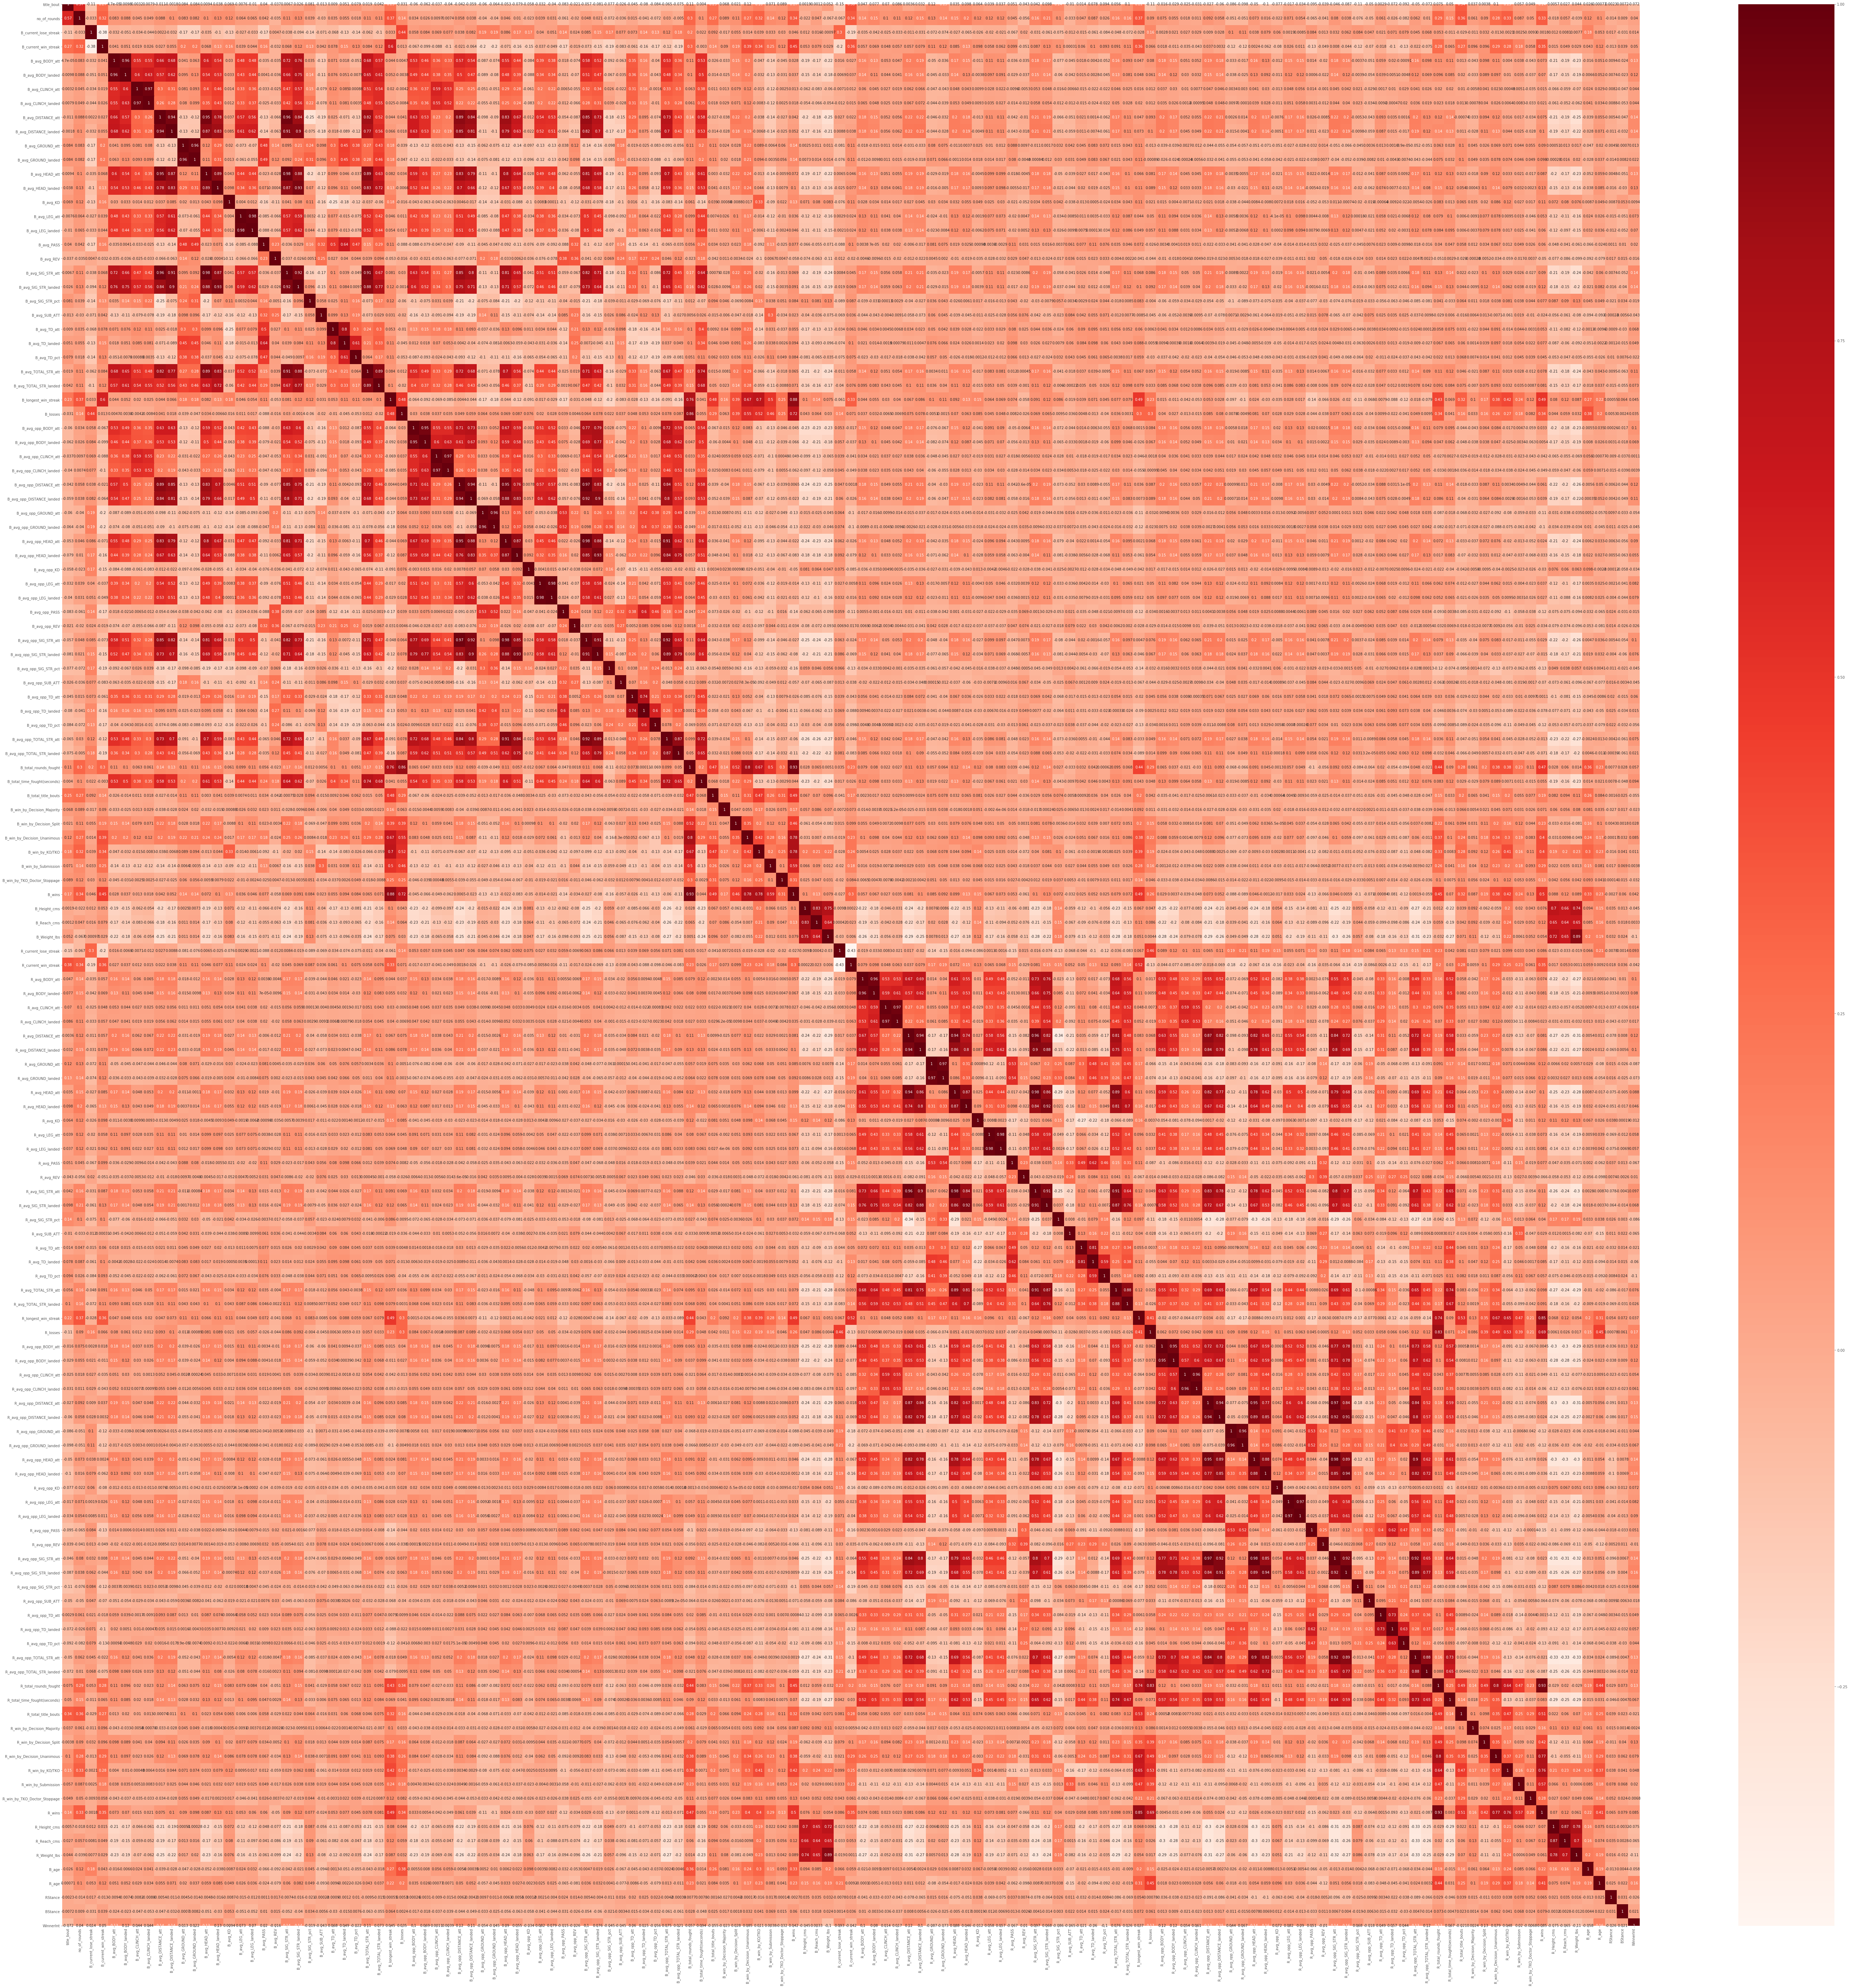

In [11]:
#visualise correlations between all numerical columns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
plt.figure(figsize=(100,100))
cor = ufc_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
#copy paste picture into paint for easier inspection

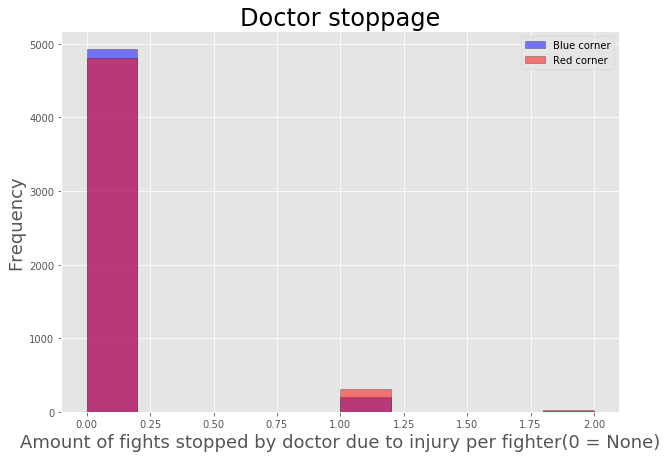

In [12]:
# Histogram of the amount of wins by doctor stoppage
ufc_data['B_win_by_TKO_Doctor_Stoppage'].plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(10,7))
ufc_data['R_win_by_TKO_Doctor_Stoppage'].plot(kind='hist',color='red',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Blue corner','Red corner'])
plt.title('Doctor stoppage', size=24)
plt.xlabel('Amount of fights stopped by doctor due to injury per fighter(0 = None)', size=18)
plt.ylabel('Frequency', size=18);
plt.show()


In [13]:
#check if stance used by fighter has any input on outcome
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.scatter(ufc_data['R_Stance'], ufc_data['R_wins'] )
plt.xlabel('Stance')
plt.ylabel('Amount of wins')
plt.title('Wins per stance')

plt.subplot(2,2,2)
ufc_data['R_Stance'].hist()
plt.title('Amount of fighters per stance')
plt.xlabel('Stance')
plt.ylabel('Fighters')

plt.subplot(2,2,3)
plt.scatter(ufc_data['B_Stance'], ufc_data['B_wins'], color = 'blue' )
plt.xlabel('Stance')
plt.ylabel('Amount of wins')
plt.title('Wins per stance')

plt.subplot(2,2,4)
ufc_data['B_Stance'].hist(color = 'blue')
plt.title('Amount of fighters per stance')
plt.xlabel('Stance')
plt.ylabel('Fighters')
#a correlation between using a certain stance and winning can be seen, but then when compared to amount of fighters using that
#specific stance it becomes clear that there are more winners with a widespread stance, which makes this not a good predictor

Text(0, 0.5, 'Fighters')

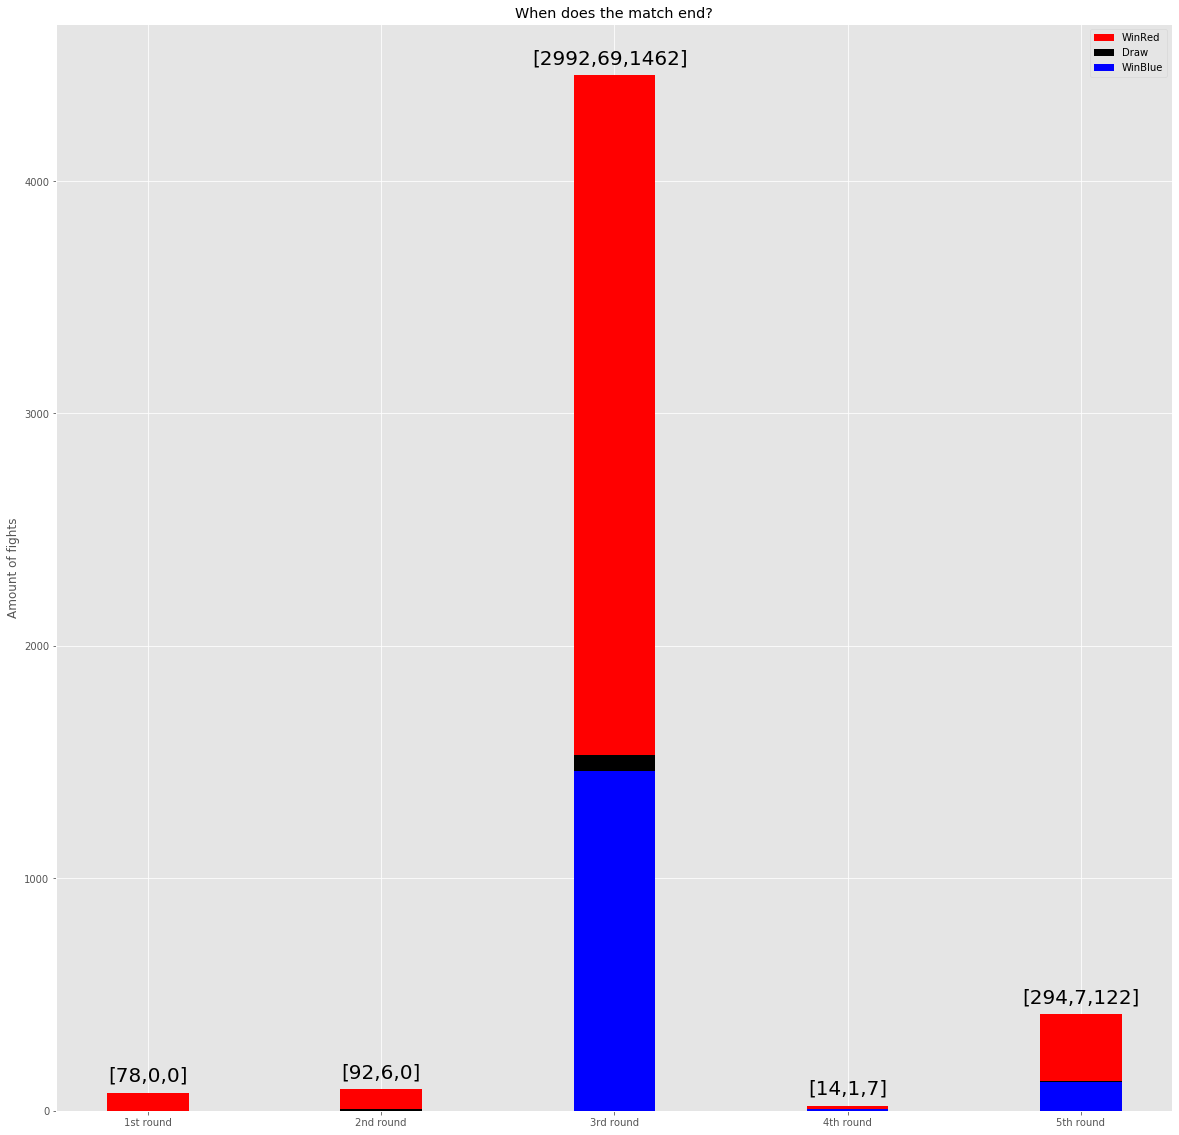

In [14]:
#check whether the red corner fighter or the blue corner is more successfull usually and in what round
import numpy as np
firstRoundRed = ufc_data[(ufc_data['no_of_rounds'] == 1) & (ufc_data['WinnerInt'] == -1)].shape[0]
firstRoundDraw = ufc_data[(ufc_data['no_of_rounds'] == 1) & (ufc_data['WinnerInt'] == 0)].shape[0]
firstRoundBlue = ufc_data[(ufc_data['no_of_rounds'] == 1) & (ufc_data['WinnerInt'] == 1)].shape[0]

secondRoundRed = ufc_data[(ufc_data['no_of_rounds'] == 2) & (ufc_data['WinnerInt'] == -1)].shape[0]
secondRoundDraw = ufc_data[(ufc_data['no_of_rounds'] == 2) & (ufc_data['WinnerInt'] == 0)].shape[0]
secondRoundBlue = ufc_data[(ufc_data['no_of_rounds'] == 2) & (ufc_data['WinnerInt'] == 1)].shape[0]

thirdRoundRed = ufc_data[(ufc_data['no_of_rounds'] == 3) & (ufc_data['WinnerInt'] == -1)].shape[0]
thirdRoundDraw = ufc_data[(ufc_data['no_of_rounds'] == 3) & (ufc_data['WinnerInt'] == 0)].shape[0]
thirdRoundBlue = ufc_data[(ufc_data['no_of_rounds'] == 3) & (ufc_data['WinnerInt'] == 1)].shape[0]

fourthRoundRed = ufc_data[(ufc_data['no_of_rounds'] == 4) & (ufc_data['WinnerInt'] == -1)].shape[0]
fourthRoundDraw = ufc_data[(ufc_data['no_of_rounds'] == 4) & (ufc_data['WinnerInt'] == 0)].shape[0]
fourthRoundBlue = ufc_data[(ufc_data['no_of_rounds'] == 4) & (ufc_data['WinnerInt'] == 1)].shape[0]

fifthRoundRed = ufc_data[(ufc_data['no_of_rounds'] == 5) & (ufc_data['WinnerInt'] == -1)].shape[0]
fifthRoundDraw = ufc_data[(ufc_data['no_of_rounds'] == 5) & (ufc_data['WinnerInt'] == 0)].shape[0]
fifthRoundBlue = ufc_data[(ufc_data['no_of_rounds'] == 5) & (ufc_data['WinnerInt'] == 1)].shape[0]

winRed = [firstRoundRed,secondRoundRed,thirdRoundRed,fourthRoundRed,fifthRoundRed]
draw = [firstRoundDraw,secondRoundDraw,thirdRoundDraw,fourthRoundDraw,fifthRoundDraw]
winBlue = [firstRoundBlue,secondRoundBlue,thirdRoundBlue,fourthRoundBlue,fifthRoundBlue]

plt.figure(figsize=(20,20))
N = 5
p1 = plt.bar(np.arange(N), winRed, 0.35,bottom = winBlue, color = 'red')
p2 = plt.bar(np.arange(N), draw, 0.35,bottom=winBlue, color = 'black')
p3 = plt.bar(np.arange(N), winBlue, 0.35, color = 'blue')



plt.ylabel('Amount of fights')
plt.title('When does the match end?')
plt.xticks(np.arange(N), ('1st round', '2nd round', '3rd round', '4th round', '5th round'))



plt.legend((p1[0], p2[0], p3[0]), ('WinRed', 'Draw', 'WinBlue'))
plt.text(x = -0.17 , y = firstRoundRed +firstRoundBlue + 50, s ='['+ str(winRed[0]) + ',' + str(draw[0]) + ','+ str(winBlue[0]) + ']' , size = 20)
plt.text(x = 1-0.17 , y = secondRoundRed +secondRoundBlue+ 50, s ='['+ str(winRed[1]) + ',' + str(draw[1]) + ','+ str(winBlue[1]) + ']' , size = 20)
plt.text(x = 2-0.35 , y = thirdRoundRed +thirdRoundBlue+ 50, s ='['+ str(winRed[2]) + ',' + str(draw[2]) + ','+ str(winBlue[2]) + ']' , size = 20)
plt.text(x = 3-0.17 , y = fourthRoundRed +fourthRoundBlue+ 50, s ='['+ str(winRed[3]) + ',' + str(draw[3]) + ','+ str(winBlue[3]) + ']' , size = 20)
plt.text(x = 4-0.25 , y = fifthRoundRed +fifthRoundBlue+ 50, s ='['+ str(winRed[4]) + ',' + str(draw[4]) + ','+ str(winBlue[4]) + ']' , size = 20)

plt.show()
#It can be seen that red corner fighters usually win more often than not, which may be due to the fact that the "champion",
#or favourite is assigned the red corner, while the underdog - the blue corner

In [15]:
#check if the fighter being more experienced leads to a bigger win chance
plt.figure(figsize=(10,10))
pltExperience = plt.scatter(ufc_data['R_total_rounds_fought'], ufc_data['R_wins'], c =ufc_data['R_age'], edgecolors='k' )
plt.xlabel('Rounds fought')
plt.ylabel('Amount of wins')
plt.title('Experience correlates to success?')
plt.colorbar(pltExperience, label = "Age of fighter")
#it can be seen that this is arguably true. Age has an effect as well, which is logical as the older a fighter is, the more
#fights he has been in and hence has received more wins

# MACHINE LEARNING ALGORITHMS AND PREDICTIONS

In [16]:
ufc_X = ufc_data.iloc[:,8:-1] # skip the strings and get all features till the one we will predict
del ufc_X['B_Stance'] #delete object stance columns, as we have them in numerical values
del ufc_X['R_Stance']
ufc_y = ufc_data['WinnerInt'] #the label we would like to predict

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ufc_X, ufc_y ,train_size = 0.7, test_size=0.3)
random_state = 43

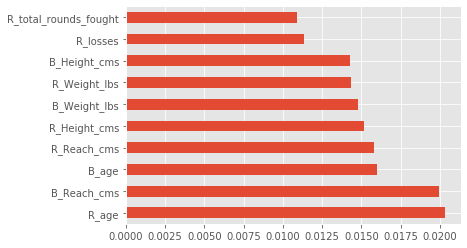

In [18]:
#use the extra tree classfier for its feature importance attribute. This will help us determine which features to use
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
#plot feature importance
feat_importances = pd.Series(model.feature_importances_, index=ufc_X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [19]:
#use the best features on our models
ufc_X = ufc_data[['R_age','B_Reach_cms','R_Height_cms','B_age', 'R_Reach_cms', 'B_Weight_lbs', 'B_Height_cms']]
ufc_y = ufc_data['WinnerInt']
X_train, X_test, y_train, y_test = train_test_split(ufc_X, ufc_y ,train_size = 0.7, test_size=0.3)

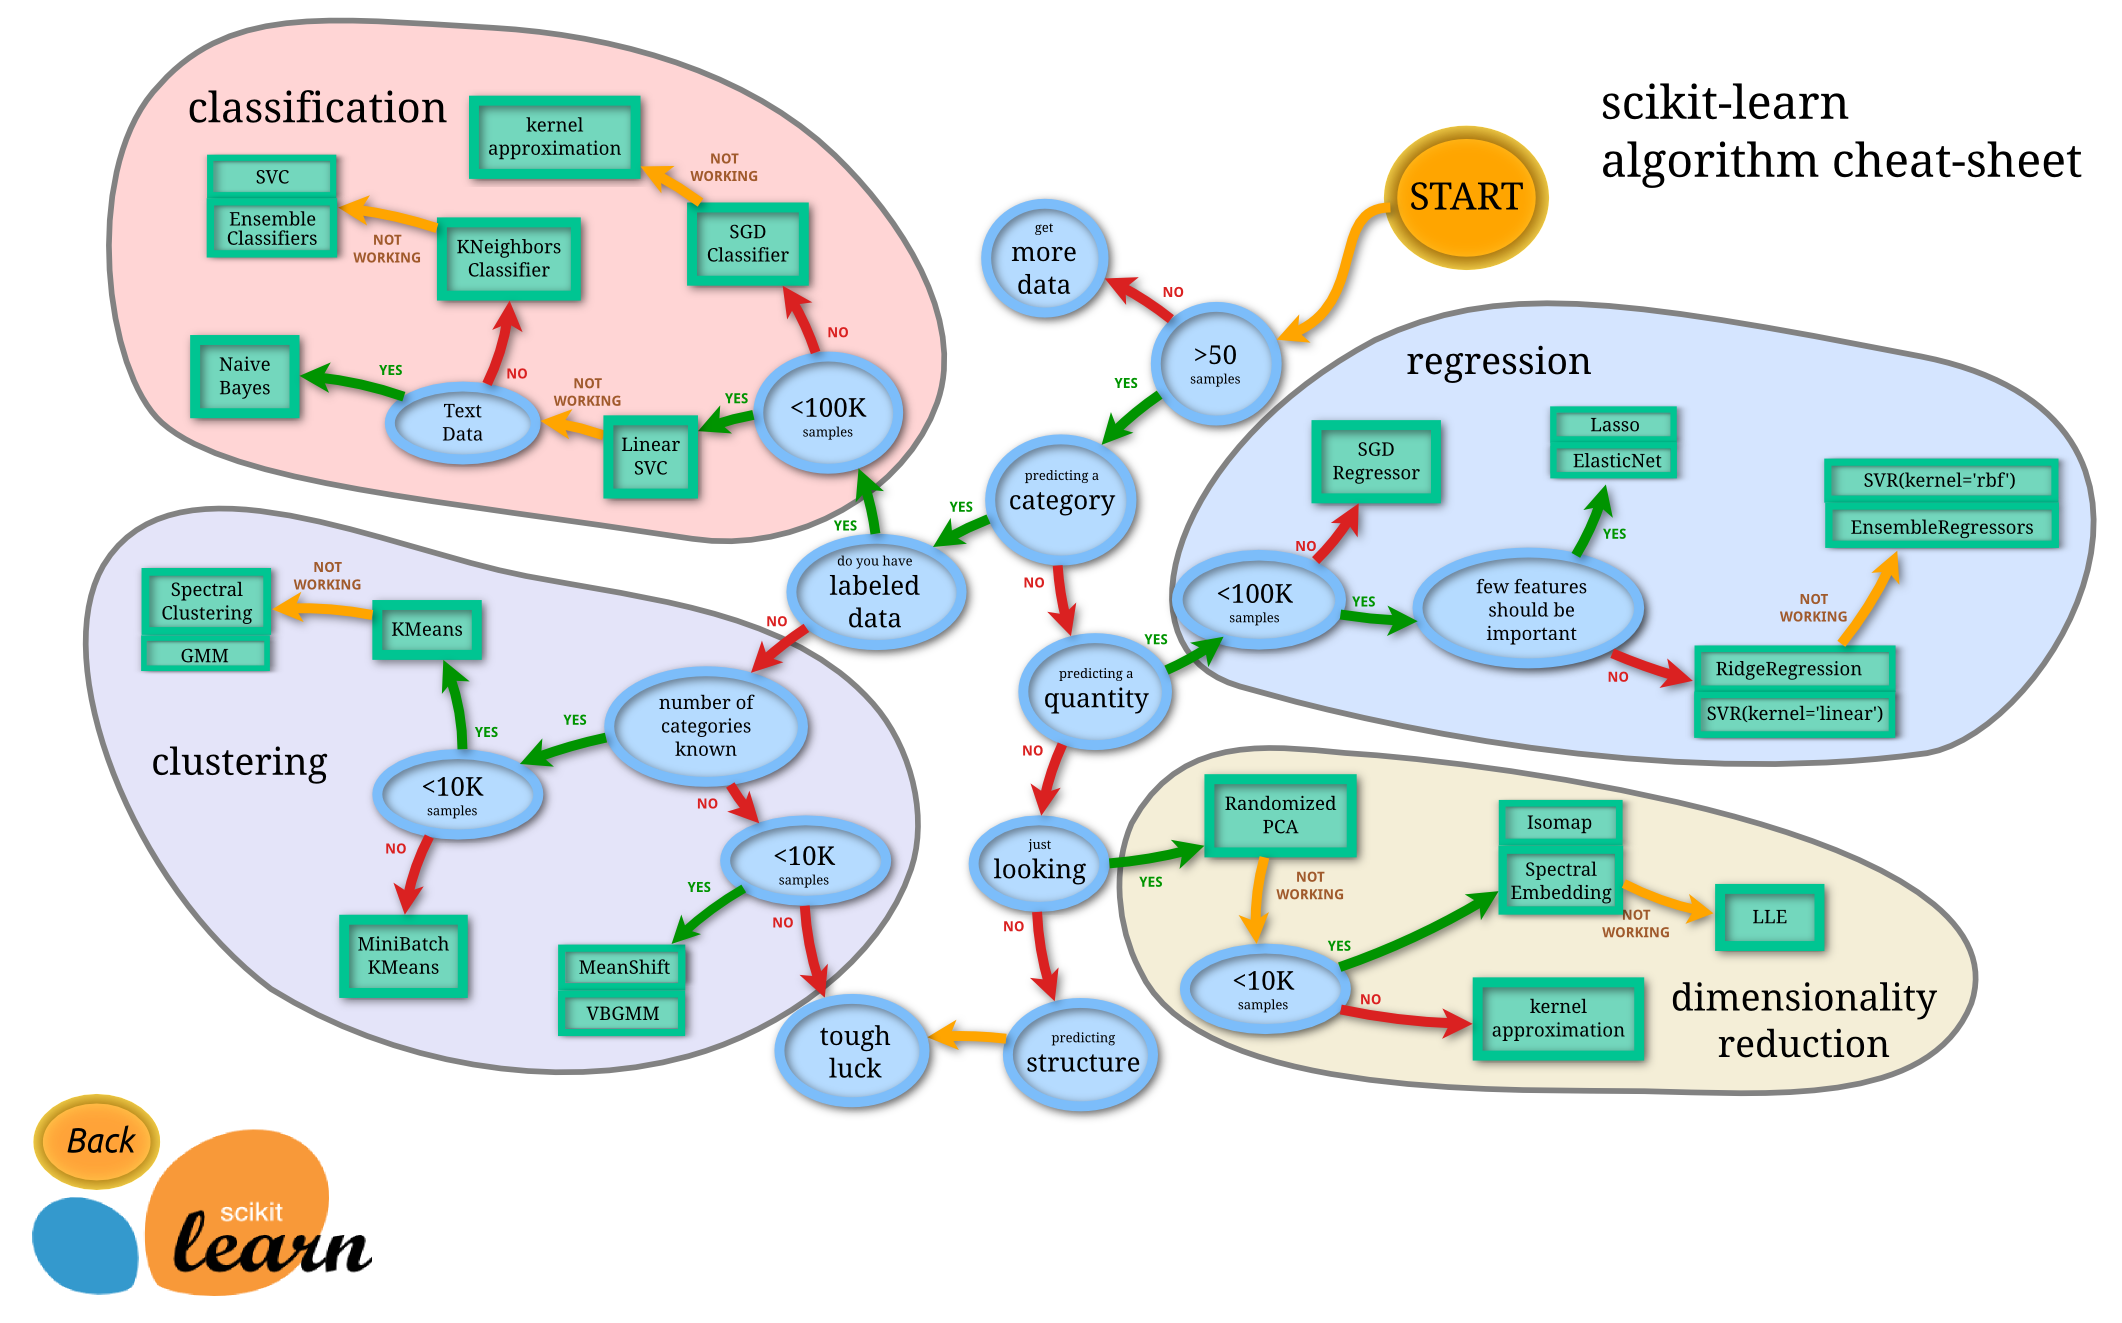

In [20]:
#use cheat sheet to determine corect models
from IPython.core.display import Image, display
display(Image('https://scikit-learn.org/stable/_static/ml_map.png', width=1365, unconfined=True))

## Decision Trees

In [21]:
#chose Decision Trees by intuition as it feels the best for this job. Use cheat sheet for furhter models
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, hamming_loss, log_loss
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 10, random_state = random_state)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accTree = accuracy_score(pred, y_test)
print("Accuracy: " + str(accTree))
print("Hamming Loss: " + str(hamming_loss(y_test, pred)))
#print("Log Loss: " + str(log_loss(y_test, pred))) can not use log loss, as it seems that all draws go to y_test
print(classification_report(y_test, pred))
#can't predict draws perhaps due to them being a very low amount or because they all go to the test set
#no ROC_curve available, because prediction is multiclass

Accuracy: 0.6619170984455959
Hamming Loss: 0.3380829015544041
              precision    recall  f1-score   support

          -1       0.69      0.91      0.78      1024
           0       0.00      0.00      0.00        24
           1       0.49      0.18      0.26       496

    accuracy                           0.66      1544
   macro avg       0.39      0.36      0.35      1544
weighted avg       0.61      0.66      0.60      1544



D:\Software\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
from sklearn.model_selection import learning_curve
def learning_curves(estimator, data, features, target, train_sizes, cv, scoring):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, data[features], data[target], train_sizes =
    train_sizes,
    cv = cv, scoring = scoring)
    train_scores_mean =  train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training score')
    plt.plot(train_sizes, validation_scores_mean, label = 'Cross-Validation score')

    plt.ylabel('Score', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,1)

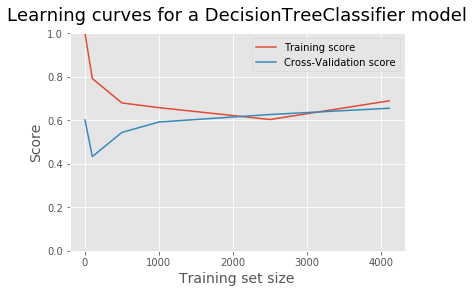

In [25]:
features  = ['R_age','B_Reach_cms','R_Height_cms','B_age', 'R_Reach_cms', 'B_Weight_lbs', 'B_Height_cms']
target = 'WinnerInt'
train_sizes = [1, 100, 500, 1000, 2500, 4114]
learning_curves(clf, ufc_data, features, target, train_sizes, 5, scoring = "accuracy")

 ## Random forest

In [27]:
# Implement a Random Forest classifier, does this improve the prediction?
# choose gini to be certain that random classifications are correct
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
clf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth = 2, min_samples_split = 10, random_state  =random_state)
clf = clf.fit(X_train, y_train)

random_pred = clf.predict(X_test)
accForest = accuracy_score(random_pred,y_test)
print(accForest)

0.6632124352331606


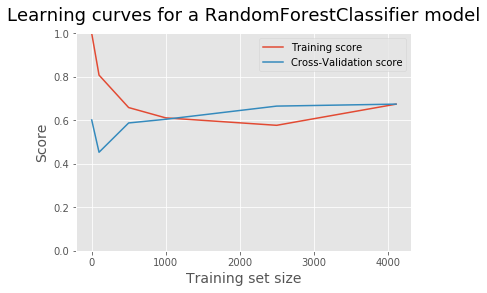

In [28]:
learning_curves(clf, ufc_data, features, target, train_sizes, 5, scoring = "accuracy")

## K-Nearest Neighbor

In [29]:
#tried distance as weight
#brute works best
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4,algorithm  = 'brute')
neigh.fit(X_train, y_train) 
accKNeigh = neigh.score(X_test,y_test)
print(accKNeigh)

0.655440414507772


## SVC

In [34]:
from sklearn.svm import SVC
clf = SVC(gamma='auto',random_state =random_state)
clf.fit(X_train, y_train) 
accSVC = clf.score(X_test,y_test)
print(accSVC)

0.6683937823834197


## AdaBoost

In [36]:
#learning rate = 2 makes it highly unstable
#algorithm choice makes no difference
clf = AdaBoostClassifier(n_estimators=100, random_state = random_state)
clf.fit(X_train, y_train) 
accBoost = clf.score(X_test,y_test)
print(accBoost)

0.6547927461139896


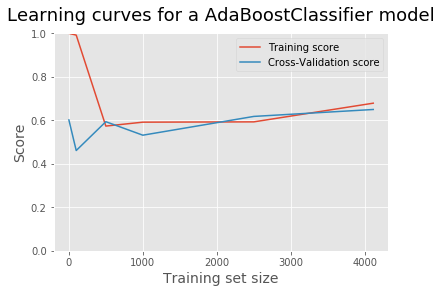

In [37]:
learning_curves(clf, ufc_data, features, target, train_sizes, 5, scoring = 'accuracy')

## Neural Nets

In [39]:
#lbfgs because the dataset is relatively small yet adam performs better 
#not using Shuffle makes it worse
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(30,30,30), activation ='tanh',learning_rate_init=0.01, random_state = random_state)
clf.fit(X_train, y_train)
accNN = clf.score(X_test, y_test)
print(accNN)

0.6632124352331606


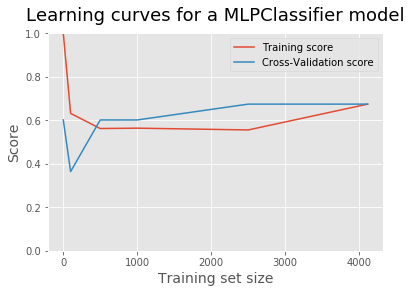

In [40]:
learning_curves(clf, ufc_data, features, target, train_sizes, 5, scoring = 'accuracy')

## Make predictions for every weight class

In [41]:
#let's see if the predictions can be better if we furhter split our predictors by weight class
weightDivision = ufc_data.groupby('weight_class', as_index = False) #group by weight

In [42]:
#Open weight division only has red winners
same = weightDivision.get_group('Open Weight')
same['Winner'].value_counts()

Red    92
Name: Winner, dtype: int64

In [43]:
#Women's featherweight has only 10 recorded matches
same = weightDivision.get_group('Women\'s Featherweight')
same['Winner'].value_counts()

Blue    6
Red     4
Name: Winner, dtype: int64


*************************
Bantamweight


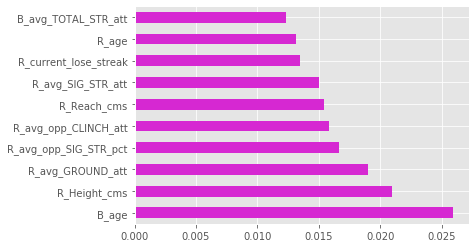

Accuracy of Bantamweight class is 0.5263157894736842

*************************
Catch Weight


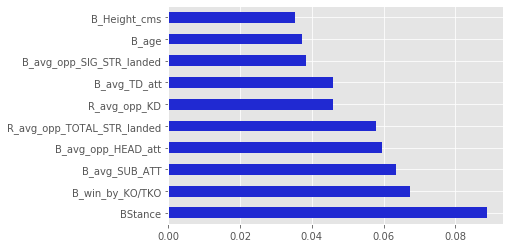

Accuracy of Catch Weight class is 0.75

*************************
Featherweight


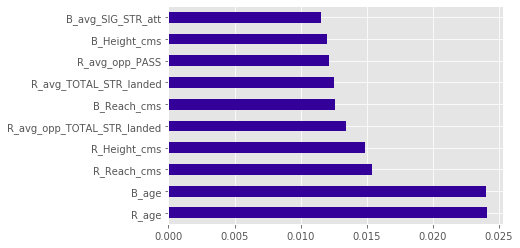

Accuracy of Featherweight class is 0.5639097744360902

*************************
Flyweight


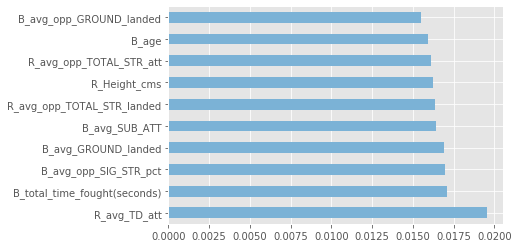

Accuracy of Flyweight class is 0.631578947368421

*************************
Heavyweight


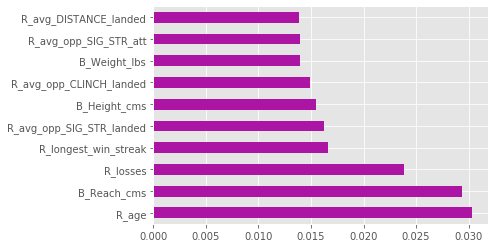

Accuracy of Heavyweight class is 0.7647058823529411

*************************
Light Heavyweight


Accuracy of Light Heavyweight class is 0.6556291390728477

*************************
Lightweight


Accuracy of Lightweight class is 0.7138047138047138

*************************
Middleweight


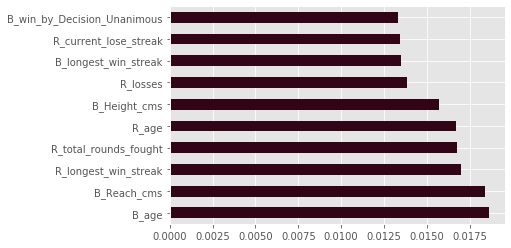

Accuracy of Middleweight class is 0.7155963302752294

*************************
Welterweight


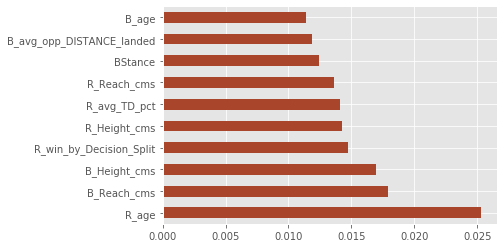

Accuracy of Welterweight class is 0.6838487972508591

*************************
Women's Bantamweight


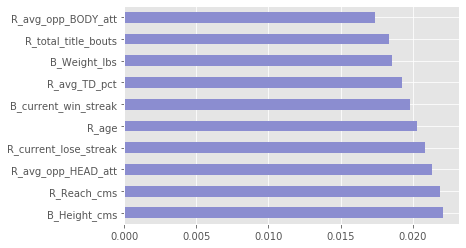

Accuracy of Women's Bantamweight class is 0.5294117647058824

*************************
Women's Flyweight


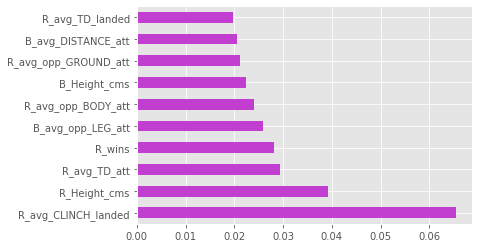

Accuracy of Women's Flyweight class is 0.4666666666666667

*************************
Women's Strawweight


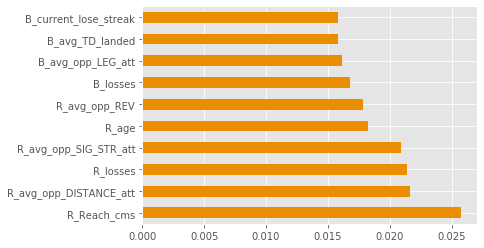

Accuracy of Women's Strawweight class is 0.5813953488372093


In [44]:
#for every weight class show the best features and use them to make a prediction using decision trees as they had the best results previously
for name, group in weightDivision:
    #skip Open and Women's featherweight
    if (name == 'Open Weight') | (name == 'Women\'s Featherweight'):
        continue
    print('\n*************************\n' + name )
    x = weightDivision.get_group(name)
    ufc_X = x.iloc[:,8:-1] #use only valuable numerical featuees
    ufc_y = x['WinnerInt']
    del ufc_X['B_Stance'] #delete stances
    del ufc_X['R_Stance']
    
    #find best features
    X_train, X_test, y_train, y_test = train_test_split(ufc_X, ufc_y ,train_size = 0.7, test_size=0.3)
    model = ExtraTreesClassifier()
    model.fit(X_train, y_train)
    #plot features
    feat_importances = pd.Series(model.feature_importances_, index=ufc_X.columns)
    feat_importances.nlargest(10).plot(kind='barh', color = np.random.rand(3,))
    plt.show()
    #use only top 10 features per weight class
    ufc_X = x[feat_importances.nlargest(10).keys()]
    X_train, X_test, y_train, y_test = train_test_split(ufc_X, ufc_y ,train_size = 0.7, test_size=0.3)
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 10, random_state = random_state)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accTree = accuracy_score(pred, y_test)
    print('Accuracy of ' + name + ' class is ' + str(accTree))